# Analysis of dataset "Amazon top bestselling books from 2009 to 2019"

    
    


### Objectives:
    - Which Type of genre of book is best seller?
    - what type of genre has the highest price?
    - Which Types of book has bigger customer base?
    - Whats the average Rating of the book?
    - Which is the most expensive book in the dataset and what's it's name?
    - Is there any trend between PRICE and Reviews?
    - Is there any trend between PRICE and Year?
    - Does features are correlated?
    
    

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


 <b>  - Getting the information from the data file  </b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


 ### Result:
 
 <b>There are 550 entries in dataset and it contains 7 features.
   Out of which " Reviews " ," Year "& " Price " are Numerical Feature. " User Rating "is continues numerical feature.while 
    " Name "," Author " and " Genre " is object type(here,they are in string format)
    </b>

 <b>  - Checking is there any null value in the dataset  ?? </b>

In [7]:
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

 ### Result:
 
 <b>From above result we can observe that there is No any null value in the dataset</b>

In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


### Result:
 
 <b> describe gives the all descriptive statitics about numerical features
- count: It gives the count of respective feature(user rating,reviews,price,year)
- mean: from above info we observed that mean of "Reviews" and "Price" is heigher than Median therefore we can say that distribution of this feature will be right skewed.while "User Rating" has slight diffrence in Mean and Median so it will almost follow Normal Distribution.
-Min(),max() shows the Minimum and Maximum value of respective Features.
- 25%,50%,75% show first,second and third qaurtile values.
</b>

In [9]:
df.shape

(550, 7)

   # visualization

## - Univariate Analysis

 <b><h4> 1. User Rating </h4></b>

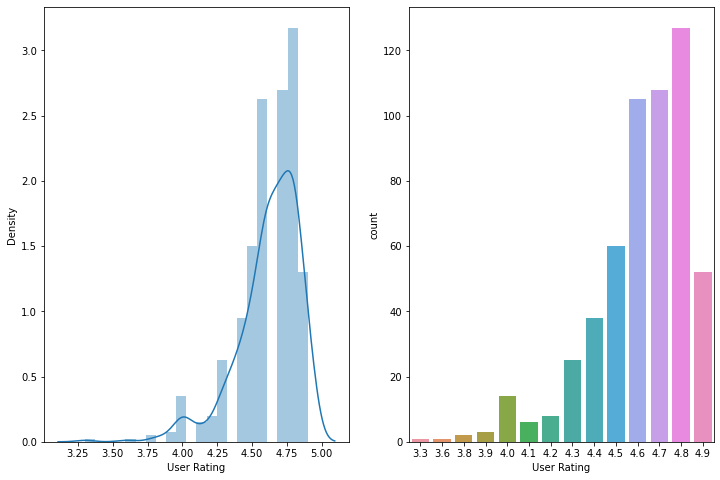

In [10]:
fig,axes = plt.subplots(1,2, figsize=(12,8))
sns.distplot(df["User Rating"], ax=axes[0])
sns.countplot(data=df, x="User Rating", ax=axes[1])
#sns.scatterplot(data=df, x="User Rating", y="Price", hue="Genre", ax=axes[1,0])
plt.show()

In [11]:
df["User Rating"].max()

4.9

In [12]:
df["User Rating"].mean()

4.618363636363641

In [13]:
df["User Rating"].min()

3.3

In [14]:
df["User Rating"].median()

4.7

In [15]:
df["Reviews"].max()

87841

In [16]:
df.sort_values(["User Rating","Reviews"],ascending=False).head(1)

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction


### Result:: 

  - From Count Plot we come to know that More than 120 readers gives the book rating as 4.8 
  - Highest User rating is 4.9 while lowest is 3.3. Average user Rating is 4.7
  - As very small difference in  mean and median values, graph shows slightly <b>left skewness</b> which may get removed after doing some transformation on data
  - The most famous book by rating and review is <b>Oh, the Places You'll Go! </b>
which having Genre Fiction.
 
 

 <b><h4> 2. Price of the book </h4></b>

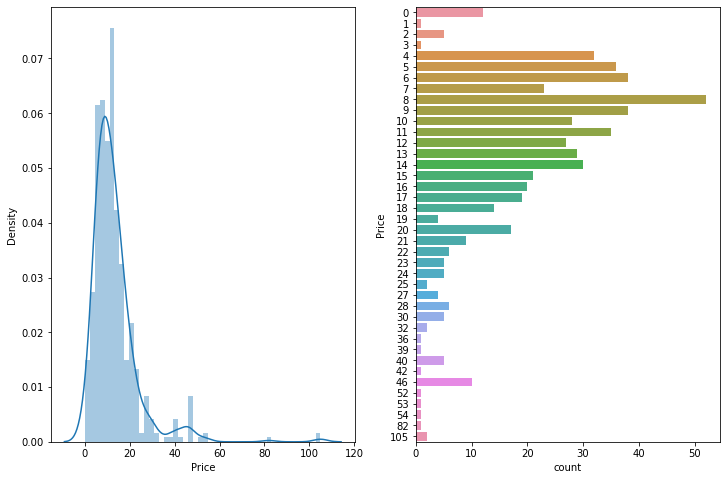

In [17]:
fig,axes = plt.subplots(1,2, figsize=(12,8))
sns.distplot(df["Price"], ax=axes[0])
sns.countplot(data=df, y="Price", ax=axes[1])
plt.show()

In [18]:
df["Price"].max()

105

In [19]:
df["Price"].mean()

13.1

In [20]:
df["Price"].min()

0

In [21]:
df["Price"].median()

11.0

In [22]:
df.sort_values("Price",ascending=False).head(1)

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction


### Result
 - From the Distribution plot we observe that, data of Price variable is <b> Right Skewed </b> i.e Outliers will present at its right end 
 - maximum price of the book is 105 USD,and name of the book is <b> Diagnostic and Statistical Manual of Mental Di...	</b>
 - As minimum price gives shows 0 USD that means it might be free of cost.



 <b><h4> 3. Year  </h4></b>

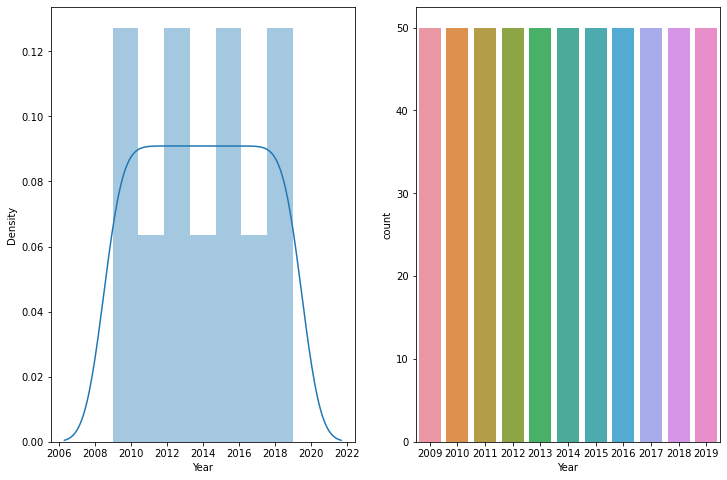

In [23]:
fig,axes = plt.subplots(1,2, figsize=(12,8))
sns.distplot(df["Year"], ax=axes[0])
sns.countplot(data=df, x="Year", ax=axes[1])
#sns.scatterplot(data=df, x="User Rating", y="Price", hue="Genre", ax=axes[1,0])
plt.show()

In [22]:
df.Year.value_counts(ascending=False)

2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: Year, dtype: int64

In [23]:
df["Year"].min()

2009

In [24]:
df["Year"].mean()

2014.0

In [25]:
df["Year"].median()

2014.0

### Result: 

  - From Count Plot we observed that occurences of count of best seller book for each year is the same(each year 50 books),therefore
    Year follows the <b> " Binomial Distribution"</b>

 

 <b><h4> 4. Genre of book </h4></b>

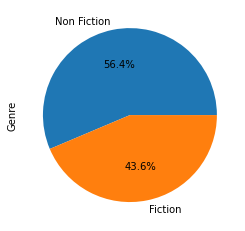

In [26]:
df["Genre"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Result: 

  - From pie chart we observed that <b >Non Fictional books are more preferable by readers than Fictionl books </b>as it has more percentage of bestselling</b>

 <b><h4> 5. Riviews of books </h4></b>

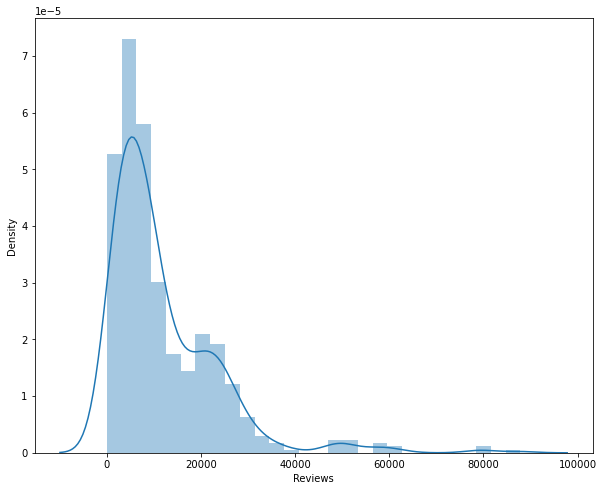

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df["Reviews"])
plt.show()

### Result:: 
- From above graph it is observe that "Reviews" variable is<b> Right skewed.</b>hence outliers will be at right tail.

### Top ten books which has highest Reviews on

In [28]:
df.sort_values("Reviews",ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


### D] Author and Name of the book which has highest reviews on

In [29]:
df.sort_values("Reviews",ascending=False).head(1)[["Name","Author"]]

,Name,Author
534,Where the Crawdads Sing,Delia Owens


### Result:
 
 <b>The name of the book is "Where the crawdads sing" and its author is " Delia owens" </b>

### - Average number of reviews

In [30]:
df["Reviews"].mean()

11953.281818181818

# Bivariate Analysis

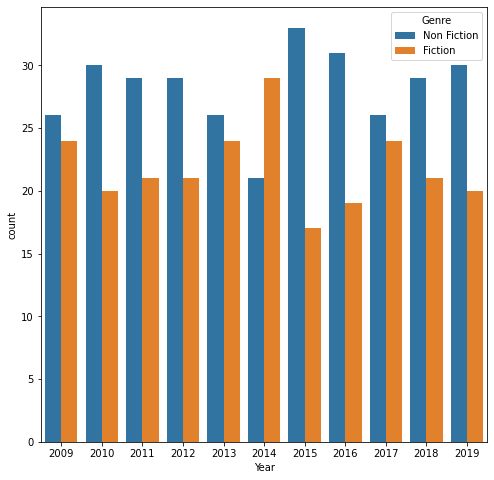

In [31]:
# Sales of particular Genre by the year

plt.figure(figsize=(8,8))
sns.countplot(df["Year"],hue=df["Genre"])
plt.show()

### Result:
- Sales of <b>Non Fictional books</b> is observed to be <b>more</b> than that of <b>Fictional book</b> over the all year  <b>except 2014</b>

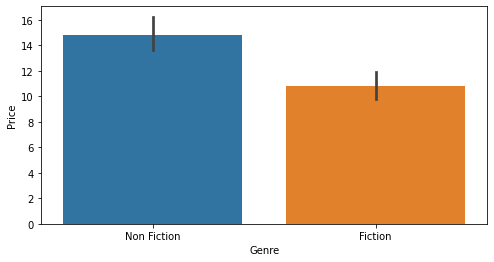

In [32]:
## Price of book accoring to category
plt.figure(figsize=(8,4))
sns.barplot(x="Genre",y="Price",data=df)
plt.show()

### Conclution:
- Price of <b>Non fictional book</b> seems to be <b>higher</b> than that of Fictional book.


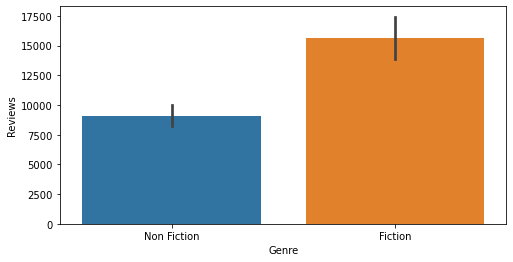

In [33]:
plt.figure(figsize=(8,4))
sns.barplot(x="Genre",y="Reviews",data=df)
plt.show()

### Result:
- It was expecting that if the sales of the Non fictional books is higher then the reviews over them should higher,but graph shoewing opposite.Fictional books have bigger customer base than the Non fictional books.

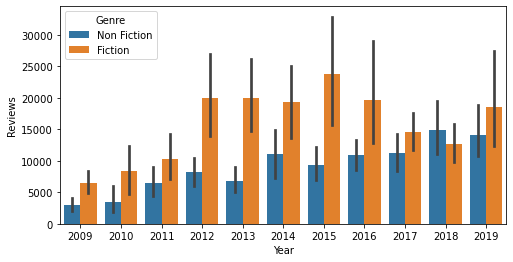

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x="Year",y="Reviews",hue="Genre",data=df)
plt.show()

### Result:
- Reviews about non fictional genre was more at year 2018.
- Reviews about fictional genre was more at year 2015.

### Is there any relation between user rating and reviews?

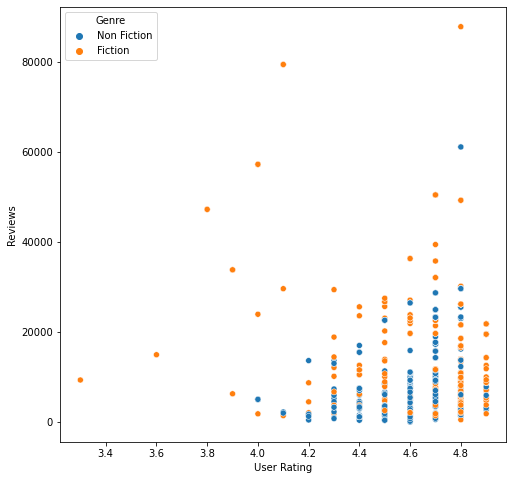

In [35]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="User Rating",y="Reviews",data=df,hue="Genre")
plt.show()

 ### Result
 - There is no special relation between user Rating and Reviews
 -From above graph we can observed that there is outlier at rating 4.8 as well as at 4.1 has reviews greater than and around 80k  respectively
 

### Is there any relation between User rating and Price?

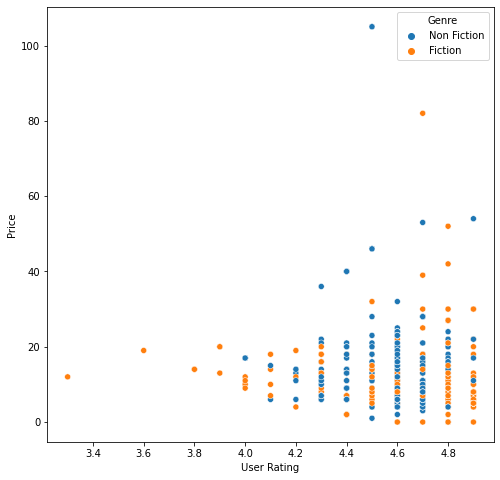

In [36]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="User Rating",y="Price",data=df,hue="Genre")
plt.show()

 ### Result:
 - There is no special relation between user Rating and Price also.
 -From above graph we can observed that there is outlier at rating 4.7 which has price around 80 usd .also at rating 4.5 price of book is greater than 100 which can conclude to be outlier

In [37]:
#reviews over the years

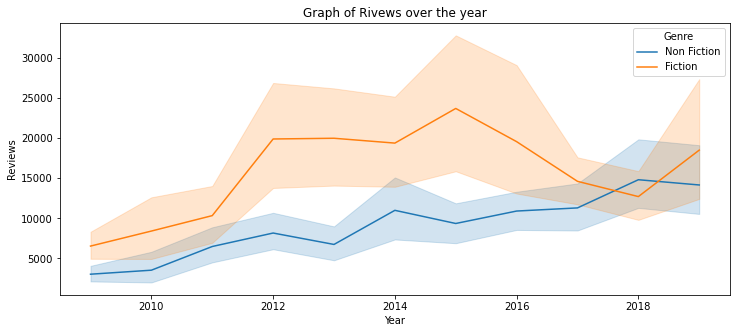

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Year",y="Reviews",data=df,hue="Genre")
plt.title("Graph of Rivews over the year")
plt.show()


### Result: 
- Trend of Reviews of fictional book was in high arond the year 2012 to 2015.but then drastically decreased.
- Reviews for Non fictional book showed linear trend from year 2009 to 2019

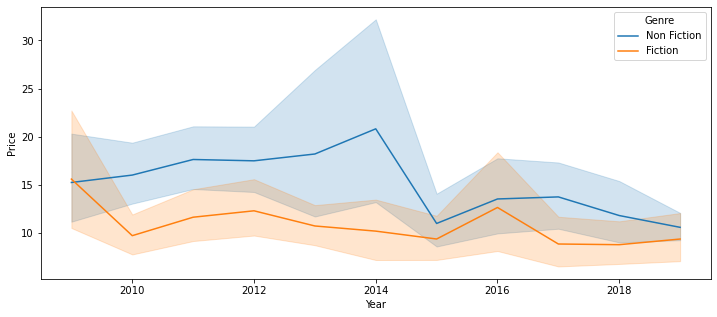

In [40]:
#price of fictional and non fictional book wrt year
plt.figure(figsize=(12,5))
sns.lineplot(x="Year",y="Price",data=df,hue="Genre")
plt.show()


### Result:: 
- Prices of Both of Categories have decreasing from 2009 to 2019.
- Specially,Price of Non fictional book drastically decreasing after year of 2014 from 20 USD to 12 USD.
 

### Conclusion: 

In [32]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


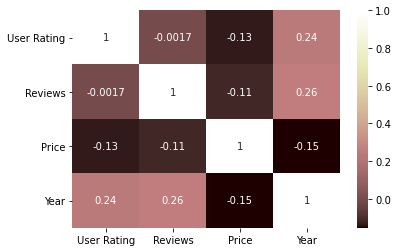

In [122]:
sns.heatmap(df.corr(), annot=True, cmap="pink")
plt.show()

### Conclusion:
 - There is no Significant correlation between the variables.

# Final Conclusion

- Distribution of feature <b> Price and "Reviews" </b>is<b> right Skewed</b>, while <b>"User Rating is left Skewed"</b>

- Non fictional books are best seller among user than Fictional book.
- Price of Non fictional book seems to be higher than that of Fictional book.
- Prices of both genre have <b>decreases over the Years</b>
- Fictional books have bigger customer base than the Non fictional books.
- Average rating for any kind of book is very good i.e 4.6
- most expensive book is <b>Diagnostic and Statistical Manual of Mental Di</b>
- The most famous book by rating and review is <b> Oh, the Places You'll Go!</b> which having Genre <b> Fiction </b>.
- Reviews about non fictional genre was more at year 2018.Reviews about fictional genre was more at year 2015.
- There is <b>No Significant Correlation</b> between<b> User Rating And Price and also User Rating and Reviews</b>